In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.image as mpimg

In [ ]:
pip install pydotplus

In [ ]:
fraud = pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,MaritalStatus,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


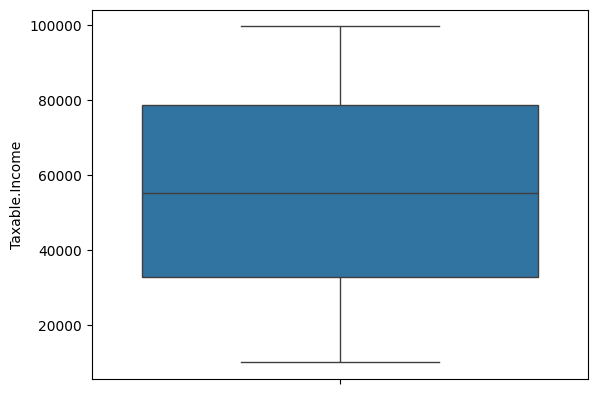

In [ ]:
ax = sns.boxplot(fraud['Taxable.Income'])

In [ ]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


<ipython-input-7-48ccbab3e1b9>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(fraud['Taxable.Income'],shade=True,color='g')


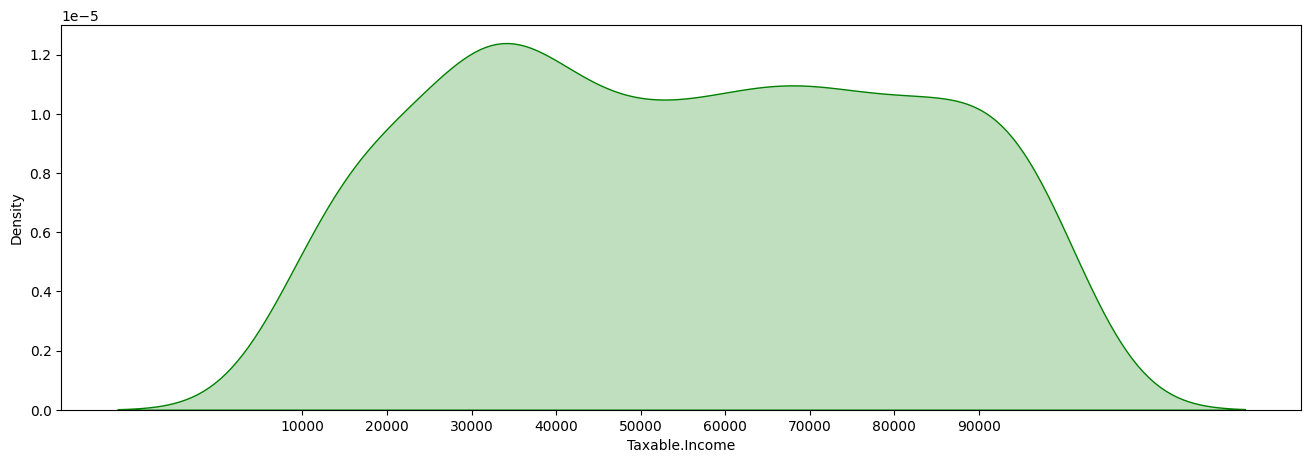

In [ ]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(fraud['Taxable.Income'].skew()))
print("Kurtosis: {}".format(fraud['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(fraud['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

In [ ]:
obj_colum = fraud.select_dtypes(include='object').columns.tolist()

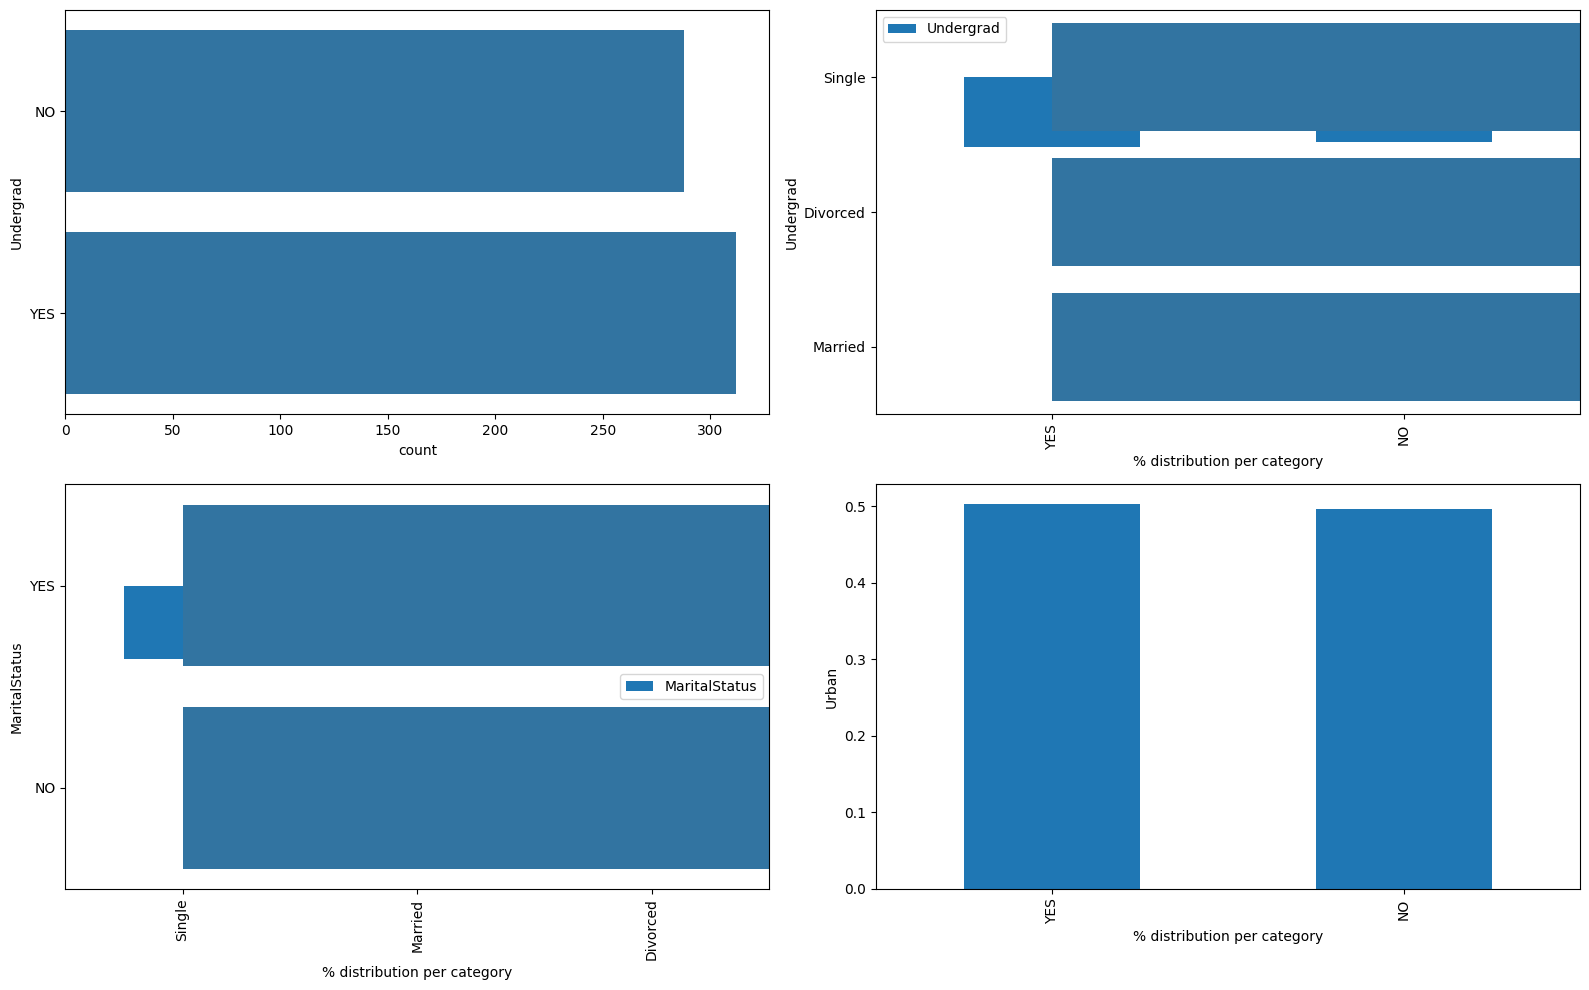

In [ ]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=fraud,y=col)
    plt.subplot(2,2,i+1)
    fraud[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [ ]:
num_columns = fraud.select_dtypes(exclude='object').columns.tolist()

<ipython-input-11-8fb6a1daf5d4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col],color='g',shade=True)
<ipython-input-11-8fb6a1daf5d4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col],color='g',shade=True)
<ipython-input-11-8fb6a1daf5d4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud[col],color='g',shade=True)


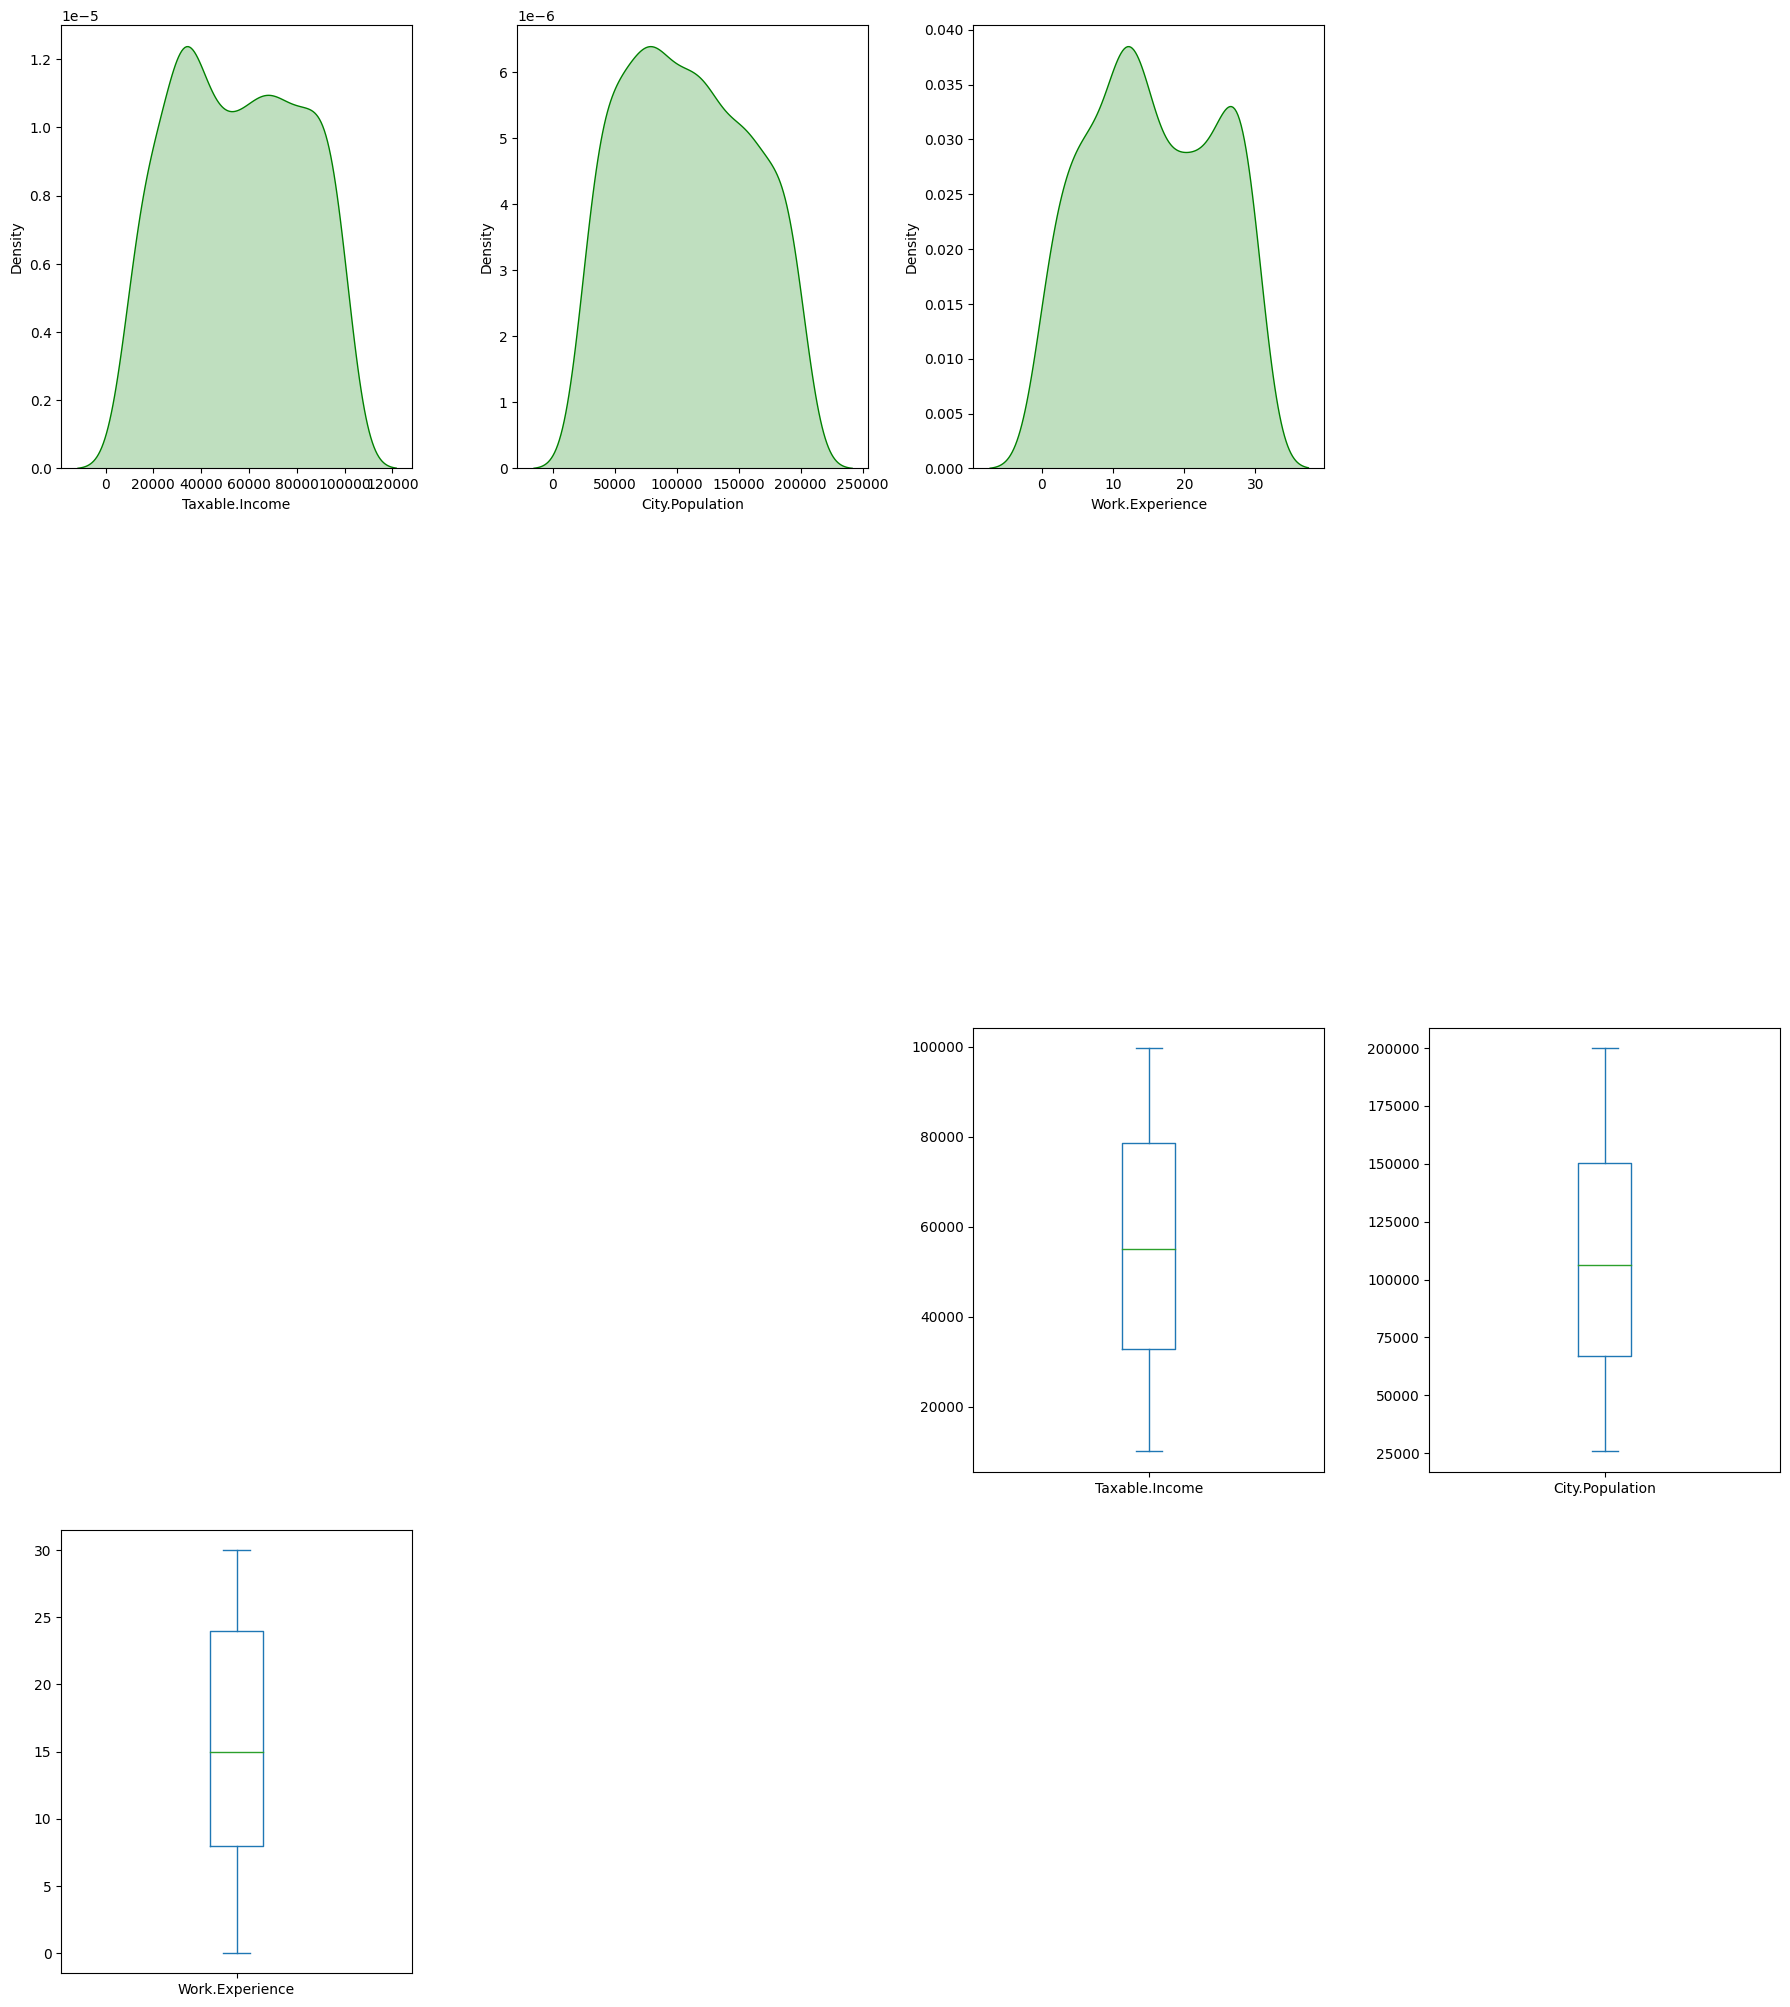

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(fraud[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    fraud[col].plot.box()
plt.tight_layout()
plt.show()
num_data = fraud[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [ ]:
fraud = pd.get_dummies(fraud, columns = ['Undergrad','MaritalStatus','Urban'])

In [ ]:
corr = fraud.corr()

In [ ]:
corr

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628
City.Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
MaritalStatus_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
MaritalStatus_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
MaritalStatus_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


In [ ]:
fraud['Taxable.Income']=pd.cut(fraud['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [ ]:
list(fraud.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Urban_NO',
 'Urban_YES']

In [ ]:
X = fraud.iloc[:,1:10]
y = fraud.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
y_train.value_counts()

good     374
risky    106
Name: Taxable.Income, dtype: int64

In [ ]:
model = RandomForestClassifier(n_jobs=4, n_estimators=150, oob_score=True, criterion='entropy')
model.fit(x_train, y_train)
oob_score = model.oob_score_

In [ ]:
pred_train = model.predict(x_train)

In [ ]:
accuracy_score(y_train,pred_train)

1.0

In [ ]:
confusion_matrix(y_train,pred_train)

array([[374,   0],
       [  0, 106]])

In [ ]:
pred_test = model.predict(x_test)

In [ ]:
accuracy_score(y_test,pred_test)

0.7666666666666667

In [ ]:
confusion_matrix(y_test,pred_test)

array([[92, 10],
       [18,  0]])

In [ ]:
fraud_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
fraud_t

,Actual,Predicted
291,good,good
274,good,good
124,good,good
77,good,risky
185,good,risky
...,...,...
427,good,good
487,good,good
371,good,good
571,good,good


In [ ]:
cols = list(fraud.columns)

In [ ]:
predictors = cols[1:10]
target = cols[0]

In [ ]:
tree1 = model.estimators_[20]

In [ ]:
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)

In [ ]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [ ]:
tree_small = rf_small.estimators_[5]

In [ ]:
dot_data = StringIO()

In [ ]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [ ]:
model.feature_importances_

array([0.52660032, 0.35416883, 0.01653133, 0.01659505, 0.01463334,
       0.01831865, 0.01770105, 0.0176627 , 0.01778873])

In [ ]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                                      'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [ ]:
fi

,feature,importance
0,City.Population,0.526600
1,Work.Experience,0.354169
5,MaritalStatus_Married,0.018319
8,Urban_YES,0.017789
6,MaritalStatus_Single,0.017701
7,Urban_NO,0.017663
3,Undergrad_YES,0.016595
2,Undergrad_NO,0.016531
4,MaritalStatus_Divorced,0.014633


#As seen in the above table city population is most important feature